<a href="https://colab.research.google.com/github/AhmedZaghl0ul/Real_time_Drowsiness_Detection/blob/main/Drowsiness_Detection(Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
akashshingha850_mrl_eye_dataset_path = kagglehub.dataset_download('akashshingha850/mrl-eye-dataset')

print('Data source import complete.')


In [ ]:
!pip install kaggle

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2025-11-14 14:35:42.096387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763130942.293545      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763130942.346960      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [ ]:
base_dir = r"/kaggle/input/mrl-eye-dataset/data"
train_dir = base_dir + r"/train"
val_dir = base_dir + r"/val"
test_dir = base_dir + r"/test"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 50937 images belonging to 2 classes.
Found 16980 images belonging to 2 classes.
Found 16981 images belonging to 2 classes.


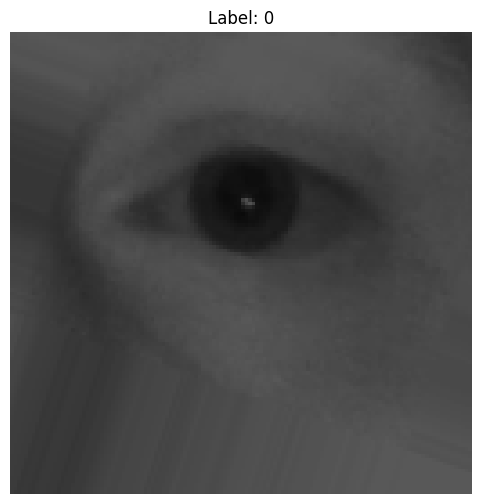

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from the training generator
images, labels = next(train_generator)

# Display the first image in the batch
plt.figure(figsize=(6, 6))
plt.imshow(images[0])
plt.title(f"Label: {int(labels[0])}")
plt.axis('off')
plt.show()

In [ ]:
print(train_generator.class_indices)

{'awake': 0, 'sleepy': 1}


In [ ]:
def get_class_distribution(generator):
    class_counts = {}
    for class_name, class_index in generator.class_indices.items():
        class_counts[class_name] = generator.labels.tolist().count(class_index)
    return class_counts

print("\n--- Training Data Class Distribution ---")
print(get_class_distribution(train_generator))

print("\n--- Validation Data Class Distribution ---")
print(get_class_distribution(val_generator))

print("\n--- Test Data Class Distribution ---")
print(get_class_distribution(test_generator))


--- Training Data Class Distribution ---
{'awake': 25770, 'sleepy': 25167}

--- Validation Data Class Distribution ---
{'awake': 8591, 'sleepy': 8389}

--- Test Data Class Distribution ---
{'awake': 8591, 'sleepy': 8390}


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3)
)

In [ ]:
base_model.trainable = False

inputs = layers.Input(shape=(128, 128, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs, outputs)

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 399s 251ms/step - accuracy: 0.9193 - loss: 0.2059 - val_accuracy: 0.9315 - val_loss: 0.1684
Epoch 2/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 259s 163ms/step - accuracy: 0.9316 - loss: 0.1768 - val_accuracy: 0.9442 - val_loss: 0.1414
Epoch 3/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 268s 168ms/step - accuracy: 0.9297 - loss: 0.1769 - val_accuracy: 0.9502 - val_loss: 0.1291
Epoch 4/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 250s 157ms/step - accuracy: 0.9352 - loss: 0.1684 - val_accuracy: 0.9402 - val_loss: 0.1503
Epoch 5/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 243s 153ms/step - accuracy: 0.9367 - loss: 0.1622 - val_accuracy: 0.9329 - val_loss: 0.1655
Epoch 6/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 257s 162ms/step - accuracy: 0.9390 - loss: 0.1565 - val_accuracy: 0.9436 - val_loss: 0.1522
Epoch 7/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 252s 158ms/step - accuracy: 0.9432 - loss: 0.1460 - val_accuracy: 0.9505 - val_loss: 0.1289
Epoch 8/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 261s 164ms/step - ac

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

531/531 ━━━━━━━━━━━━━━━━━━━━ 109s 206ms/step - accuracy: 0.9572 - loss: 0.1088
Test Loss: 0.1216
Test Accuracy: 0.9554


In [ ]:
model.save("mobilenet_eye_model.h5")
print("Model saved successfully!")

Model saved successfully!


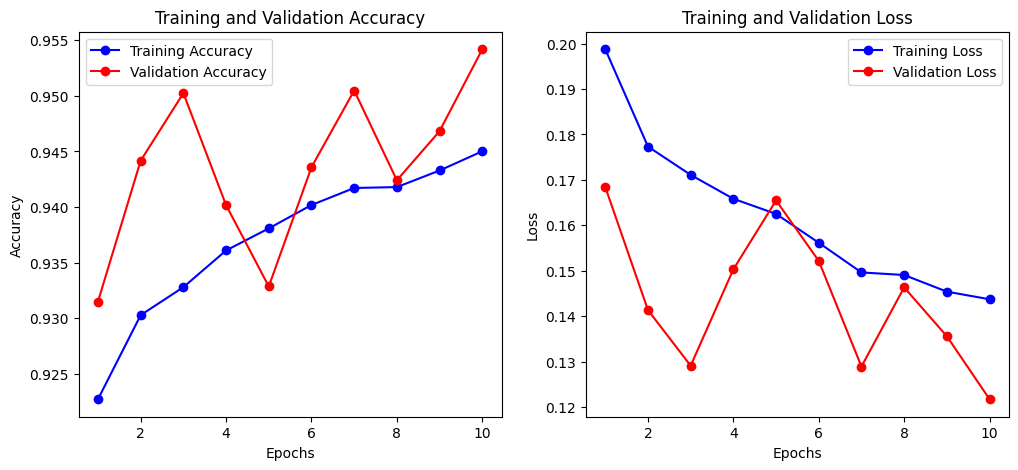

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# **Fine-Tuning**

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam


early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=1,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model_phase2.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [ ]:
vgg19_base = model.get_layer('mobilenetV2')

vgg19_base.trainable = True

for layer in vgg19_base.layers[:-4]:
    layer.trainable = False

for layer in vgg19_base.layers:
  print(f"{layer.name}: Trainable = {layer.trainable}")

In [ ]:
model = models.Sequential([
    vgg19_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 7, 7, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,156,993 (76.89 MB)

 Trainable params: 7,211,521 (27.51 MB)

 Non-trainable params: 12,945,472 (49.38 MB)

In [ ]:
history_fn = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1762791142.491123     132 service.cc:148] XLA service 0x7ae9c4007e50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762791142.491933     132 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1762791143.206561     132 cuda_dnn.cc:529] Loaded cuDNN version 90300


   1/1592 ━━━━━━━━━━━━━━━━━━━━ 5:57:07 13s/step - accuracy: 0.5312 - loss: 0.8301

I0000 00:00:1762791152.844928     132 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1592/1592 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.8149 - loss: 0.4058
Epoch 1: val_loss improved from inf to 0.16059, saving model to best_model_phase2.keras
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 1021s 633ms/step - accuracy: 0.8149 - loss: 0.4057 - val_accuracy: 0.9350 - val_loss: 0.1606
Epoch 2/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.9162 - loss: 0.2159
Epoch 2: val_loss did not improve from 0.16059
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 631s 396ms/step - accuracy: 0.9162 - loss: 0.2159 - val_accuracy: 0.7264 - val_loss: 0.5690
Epoch 3/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.9351 - loss: 0.1740
Epoch 3: val_loss did not improve from 0.16059
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 621s 390ms/step - accuracy: 0.9351 - loss: 0.1740 - val_accuracy: 0.9241 - val_loss: 0.1844
Epoch 4/10
1592/1592 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.9431 - loss: 0.1504
Epoch 4: val_loss improved from 0.16059 to 0.11589, saving model to best_model_phase2.keras
1592/15

In [ ]:
model.save('/kaggle/working/best_model.keras')

In [ ]:
model.save('/kaggle/working/mrl_eye_model.h5')

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

531/531 ━━━━━━━━━━━━━━━━━━━━ 129s 243ms/step - accuracy: 0.9684 - loss: 0.0803
Test Loss: 0.0905
Test Accuracy: 0.9655


In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

NameError: name 'history' is not defined